### Zadatak 5
Neka na česticu u ravnini djeluje potencijal ${U(x, y) = 4x^2y^3}$. Nacrtajte ekvipotencijalne konture ovog potencijala. <br>Nadalje, rješavajući numerički Newtonovu diferencijalnu jednadžbu gibanja, pronadite putanju čestice, uz početne uvjete
${x(0) = y(0) = 1}$, ${v_x(0) = 2}$, ${v_y(0) = 3}$, od trenutka ${t = 0}$ do trenutka ${t = 1,43}$.
Nacrtajte tu putanju, a onda je pokušajte superponirati na gore dobivene konture potencijala. Igrajte se malo s početnim uvjetima i uvjerite se da je sve OK. <br>
Grafički usporedite kinetičku, potencijalnu i ukupnu energiju u ovisnosti o
vremenu.

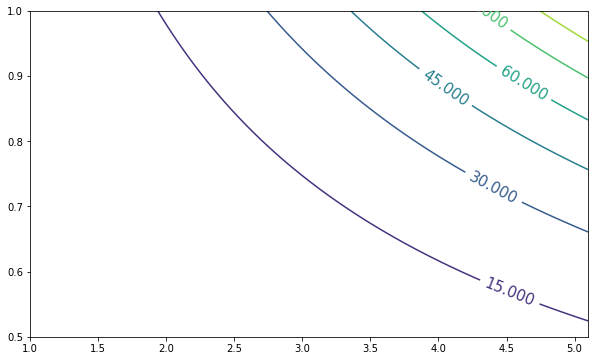

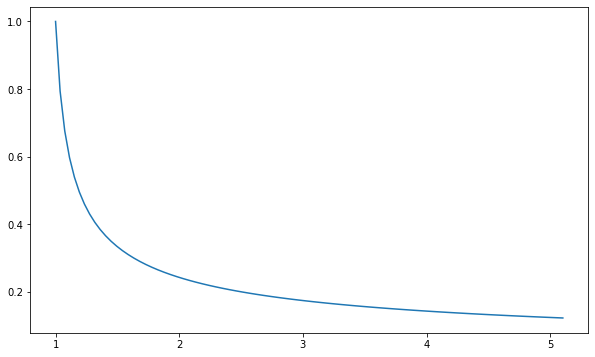

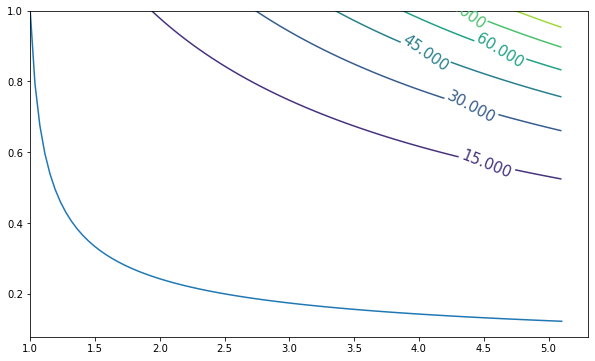

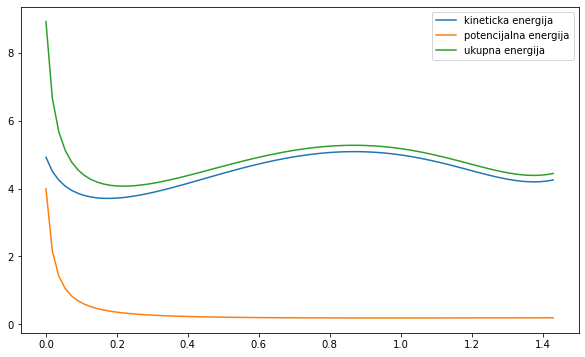

In [1]:
%matplotlib inline
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint

X, Y = np.meshgrid(np.linspace(1, 5.1, 200), np.linspace(0.5, 1, 200))
Z = 4*X**2*Y**3

def nabla(x, y, i):
    a, b = symbols('a, b')
    nablaU = [diff(4 * a**2 * b**3, a), diff(4 * a**2 * b**3, b)]
    return nablaU[i].subs({a:x, b:y})

def funkcija(x, t):
    return [x[2], -nabla(x[2], x[1], 0), x[3], -nabla(x[0], x[1], 1)]

ts = np.linspace(0, 1.43, 80)
x0 = [1, 1, 2, 3]
xs = odeint(funkcija, x0, ts)

potencijalna = (4 * xs[:, 0]**2 * xs[:, 1]**3)
kineticka = np.sqrt((xs[:,2]**2 / 2)**2 + (xs[:,3]**2 / 2)**2)

fog, ox = plt.subplots(figsize=[10, 6])
CS = ox.contour(X, Y, Z)
ox.clabel(CS, inline=True, fontsize=15)

fug, ux = plt.subplots(figsize=[10, 6])
ux.plot(xs[:,0], xs[:,1])

fig, ax = plt.subplots(figsize=[10, 6])
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=15)
ax.plot(xs[:,0], xs[:,1])

feg, ex = plt.subplots(figsize=[10, 6])
ex.plot(ts, kineticka, label='kineticka energija')
ex.plot(ts, potencijalna, label = 'potencijalna energija')
ex.plot(ts, potencijalna + kineticka, label='ukupna energija')
ex.legend()